In [1]:
import os

os.environ['TMPDIR'] = '/research/rkhithani/tmp'
os.environ['XDG_CACHE_HOME'] = '/research/rkhithani/.cache'
os.environ['PIP_NO_CACHE_DIR'] = 'off'

import pathlib

pathlib.Path('/research/rkhithani/tmp').mkdir(parents=True, exist_ok=True)
pathlib.Path('/research/rkhithani/.cache').mkdir(parents=True, exist_ok=True)


In [2]:
pip uninstall numpy -y


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip uninstall tensorflow -y

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy==1.24.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 120.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow==2.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 118.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 KB 313.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 163.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 116.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 KB 283.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 120.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.13.2
    Uninstalling typing_extensions-4.13.2:
      Successfully uninstalled typing_extensions-4.13.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation

In [6]:
pip install pandas yfinance matplotlib scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
ticker = "GOOG"
number_of_years = 20
end_date = datetime(2025, 4, 18)
start_date = end_date - timedelta(days=365*number_of_years)
#df = yf.download(ticker, start=start_date, end=end_date)

#df = df["Close"]

#df

In [3]:
df = pd.read_csv("googleStockPrice.csv", parse_dates=["Date"])

# Filter by date range
df = df[(df["Date"] >= start_date) & (df["Date"] < end_date)]

# Set Date as index and select Close column
df.set_index("Date", inplace=True)
df = df["Close"]
df

Date
2005-04-25      5.57
2005-04-26      5.45
2005-04-27      5.47
2005-04-28      5.47
2005-04-29      5.48
               ...  
2025-04-11    159.40
2025-04-14    161.47
2025-04-15    158.68
2025-04-16    155.50
2025-04-17    153.36
Name: Close, Length: 5036, dtype: float64

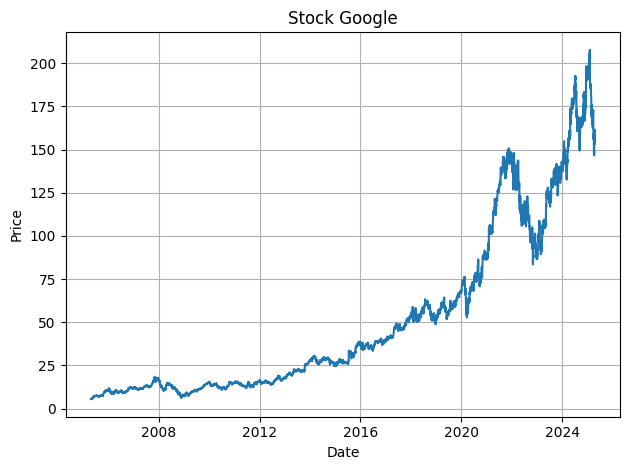

In [4]:
plt.plot(df.index,df)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Google")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
def create_windowed_dataframe1(dataframe, start_date, end_date, window_size=3):
  current_date = start_date
  target_dates = []
  feature_windows, targets = [], []

  reached_end = False
  while True:
    # Get a rolling window of data ending at current_date
    window_df = dataframe.loc[:current_date].tail(window_size + 1)

    # Ensure the window has enough rows
    if len(window_df) != window_size + 1:
        print(f'Error: Window of size {window_size} is too large for date {current_date}')
        return

    # Split window into features (X) and target (Y)
    window_values = window_df.to_numpy()
    window_features, window_target = window_values[:-1], window_values[-1]

    # Store date, features, and target
    target_dates.append(current_date)
    feature_windows.append(window_features)
    targets.append(window_target)

    # Move to the next date, assuming a weekly interval
    next_week_df = dataframe.loc[current_date:current_date + timedelta(days=7)]
    next_datetime_str = str(next_week_df.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year, month, day = map(int, next_date_str.split('-'))
    next_date = datetime(day=day, month=month, year=year)

    current_date = next_date

    # Stop if we've reached the final date
    if current_date == end_date:
        reached_end = True

    if reached_end:
        break

  # Create the final DataFrame
  output_df = pd.DataFrame({})
  output_df['Target Date'] = target_dates

  # Convert feature list to NumPy array for column-wise access
  feature_array = np.array(feature_windows)
  for i in range(window_size):
      output_df[f'Target-{window_size - i}'] = feature_array[:, i]

  output_df['Target'] = targets

  return output_df

In [6]:
def create_windowed_dataframe(dataframe, start_date, end_date, window_size=3):
    current_date = start_date
    target_dates = []
    feature_windows, targets = [], []

    while current_date <= end_date:
        window_df = dataframe.loc[:current_date].tail(window_size + 1)

        if len(window_df) != window_size + 1:
            print(f'Error: Window of size {window_size} is too large for date {current_date}')
            break

        window_values = window_df.to_numpy()
        window_features, window_target = window_values[:-1], window_values[-1]

        target_dates.append(current_date)
        feature_windows.append(window_features)
        targets.append(window_target)

        # Move to the next valid date within a 7-day window
        future_window = dataframe.loc[current_date + timedelta(days=1): current_date + timedelta(days=7)]
        if future_window.empty:
            print(f"No future data available after {current_date}, stopping.")
            break

        next_date = future_window.index[0]
        if next_date <= current_date:
            print(f"Next date {next_date} is not ahead of current date {current_date}, stopping to prevent infinite loop.")
            break

        current_date = next_date

    # Construct final output DataFrame
    output_df = pd.DataFrame()
    output_df['Target Date'] = target_dates

    feature_array = np.array(feature_windows)
    for i in range(window_size):
        output_df[f'Target-{window_size - i}'] = feature_array[:, i]

    output_df['Target'] = targets  # Target as last column

    return output_df


In [7]:
print(df)
window = 4
first = datetime(2005, 4, 29)
last = datetime(2025, 4, 17)
windowed_df = create_windowed_dataframe(df, first, last, window)
print(windowed_df)
#print(first)
#print(last)
#start_date

Date
2005-04-25      5.57
2005-04-26      5.45
2005-04-27      5.47
2005-04-28      5.47
2005-04-29      5.48
               ...  
2025-04-11    159.40
2025-04-14    161.47
2025-04-15    158.68
2025-04-16    155.50
2025-04-17    153.36
Name: Close, Length: 5036, dtype: float64
No future data available after 2025-04-17 00:00:00, stopping.
     Target Date  Target-4  Target-3  Target-2  Target-1  Target
0     2005-04-29      5.57      5.45      5.47      5.47    5.48
1     2005-05-02      5.45      5.47      5.47      5.48    5.54
2     2005-05-03      5.47      5.47      5.48      5.54    5.63
3     2005-05-04      5.47      5.48      5.54      5.63    5.69
4     2005-05-05      5.48      5.54      5.63      5.69    5.65
...          ...       ...       ...       ...       ...     ...
5020  2025-04-11    149.24    146.58    161.06    155.37  159.40
5021  2025-04-14    146.58    161.06    155.37    159.40  161.47
5022  2025-04-15    161.06    155.37    159.40    161.47  158.68
5023  2025

In [8]:
def split_windowed_df(windowed_dataframe):
    # Extract the first column as dates
    date_array = pd.to_datetime(windowed_dataframe.iloc[:, 0]).to_numpy()

    # Extract all columns except the first and last as input features
    feature_matrix = windowed_dataframe.iloc[:, 1:-1].to_numpy().astype(np.float32)

    # Reshape features to 3D array: (samples, time_steps, 1 feature per step)
    X = feature_matrix.reshape((len(date_array), feature_matrix.shape[1], 1))

    # Extract the last column as target values
    y = windowed_dataframe.iloc[:, -1].astype(np.float32).to_numpy().reshape(-1)

    return date_array, X.astype(np.float32), y


dates, X, y = split_windowed_df(windowed_df)

dates.shape, X.shape, y.shape

((5025,), (5025, 4, 1), (5025,))

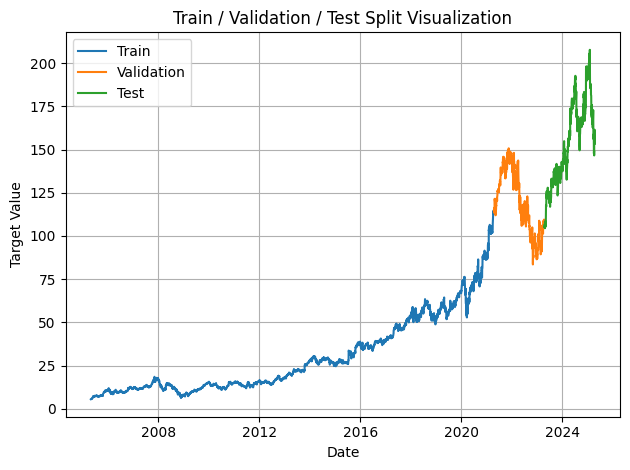

In [9]:
# Calculate indices for 80% training and 90% validation splits
train_end_idx = int(len(dates) * 0.80)
val_end_idx = int(len(dates) * 0.90)

# Split the dataset into training, validation, and testing sets
train_dates, X_train_split, y_train_split = dates[:train_end_idx], X[:train_end_idx], y[:train_end_idx]
val_dates, X_val_split, y_val_split = dates[train_end_idx:val_end_idx], X[train_end_idx:val_end_idx], y[train_end_idx:val_end_idx]
test_dates, X_test_split, y_test_split = dates[val_end_idx:], X[val_end_idx:], y[val_end_idx:]

train_dates_un_scaled, X_train_split_un_scaled, y_train_split_un_scaled = dates[:train_end_idx], X[:train_end_idx], y[:train_end_idx]
val_dates_un_scaled, X_val_split_un_scaled, y_val_split_un_scaled = dates[train_end_idx:val_end_idx], X[train_end_idx:val_end_idx], y[train_end_idx:val_end_idx]
test_dates_un_scaled, X_test_split_un_scaled, y_test_split_un_scaled = dates[val_end_idx:], X[val_end_idx:], y[val_end_idx:]


scaler = MinMaxScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train_split.reshape(-1, X_train_split.shape[1]))
X_train_split = X_train_scaled.reshape(X_train_split.shape)

# Use the same scaler to transform val/test
X_val_scaled = scaler.transform(X_val_split.reshape(-1, X_val_split.shape[1]))
X_val_split = X_val_scaled.reshape(X_val_split.shape)

X_test_scaled = scaler.transform(X_test_split.reshape(-1, X_test_split.shape[1]))
X_test_split = X_test_scaled.reshape(X_test_split.shape)

# Plot the time series target values for each dataset split
plt.plot(train_dates, y_train_split, label='Train')
plt.plot(val_dates, y_val_split, label='Validation')
plt.plot(test_dates, y_test_split, label='Test')

# Display the legend
plt.legend()
plt.xlabel("Date")
plt.ylabel("Target Value")
plt.title("Train / Validation / Test Split Visualization")
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((window, 1)),
                    layers.LSTM(16),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

info = model.fit(X_train_split, y_train_split, validation_data=(X_val_split, y_val_split), epochs=100)

2025-05-05 10:02:30.990324: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-05 10:02:31.047817: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-05 10:02:32.077657: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2025-05-05 10:02:33.014945: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at htt

Epoch 1/100
126/126 [==============================] - 3s 8ms/step - loss: 1052.9459 - mean_absolute_error: 24.4525 - val_loss: 5892.0586 - val_mean_absolute_error: 74.7219
Epoch 2/100
126/126 [==============================] - 0s 4ms/step - loss: 105.7593 - mean_absolute_error: 6.6779 - val_loss: 1457.3247 - val_mean_absolute_error: 34.7813
Epoch 3/100
126/126 [==============================] - 0s 3ms/step - loss: 7.8385 - mean_absolute_error: 1.4448 - val_loss: 924.6719 - val_mean_absolute_error: 26.7307
Epoch 4/100
126/126 [==============================] - 0s 3ms/step - loss: 4.9797 - mean_absolute_error: 1.3366 - val_loss: 649.5201 - val_mean_absolute_error: 21.6845
Epoch 5/100
126/126 [==============================] - 0s 4ms/step - loss: 4.0169 - mean_absolute_error: 1.3471 - val_loss: 507.0904 - val_mean_absolute_error: 18.7888
Epoch 6/100
126/126 [==============================] - 0s 4ms/step - loss: 3.5523 - mean_absolute_error: 1.3311 - val_loss: 428.3858 - val_mean_absolute

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model_un_scaled = Sequential([layers.Input((window, 1)),
                    layers.LSTM(16),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model_un_scaled.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

info_un_scaled = model_un_scaled.fit(X_train_split_un_scaled, y_train_split_un_scaled, 
                                     validation_data=(X_val_split_un_scaled, y_val_split_un_scaled), epochs=100)

Epoch 1/100
126/126 [==============================] - 3s 7ms/step - loss: 965.7773 - mean_absolute_error: 22.6884 - val_loss: 7601.2559 - val_mean_absolute_error: 85.1967
Epoch 2/100
126/126 [==============================] - 0s 4ms/step - loss: 95.2870 - mean_absolute_error: 4.5753 - val_loss: 1857.6407 - val_mean_absolute_error: 39.2154
Epoch 3/100
126/126 [==============================] - 0s 4ms/step - loss: 5.6525 - mean_absolute_error: 0.8238 - val_loss: 913.9077 - val_mean_absolute_error: 25.3515
Epoch 4/100
126/126 [==============================] - 0s 4ms/step - loss: 1.8635 - mean_absolute_error: 0.6054 - val_loss: 595.2701 - val_mean_absolute_error: 19.6400
Epoch 5/100
126/126 [==============================] - 0s 4ms/step - loss: 1.2262 - mean_absolute_error: 0.6077 - val_loss: 452.9093 - val_mean_absolute_error: 16.6546
Epoch 6/100
126/126 [==============================] - 0s 4ms/step - loss: 1.0057 - mean_absolute_error: 0.5715 - val_loss: 381.6621 - val_mean_absolute_e

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2785 (10.88 KB)
Trainable params: 2785 (10.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


16/16 [==============================] - 0s 2ms/step


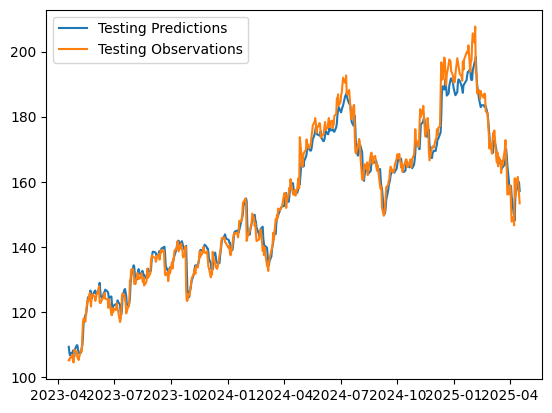

In [12]:
test_predictions = model.predict(X_test_split).flatten()

plt.plot(test_dates, test_predictions)
plt.plot(test_dates, y_test_split)
plt.legend(['Testing Predictions', 'Testing Observations'])

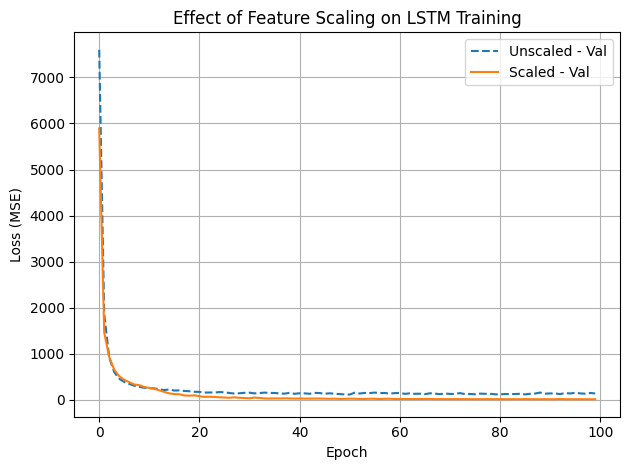

In [15]:
plt.plot(info_un_scaled.history['val_loss'], label='Unscaled - Val', linestyle='--')
plt.plot(info.history['val_loss'], label='Scaled - Val')
plt.title("Effect of Feature Scaling on LSTM Training")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

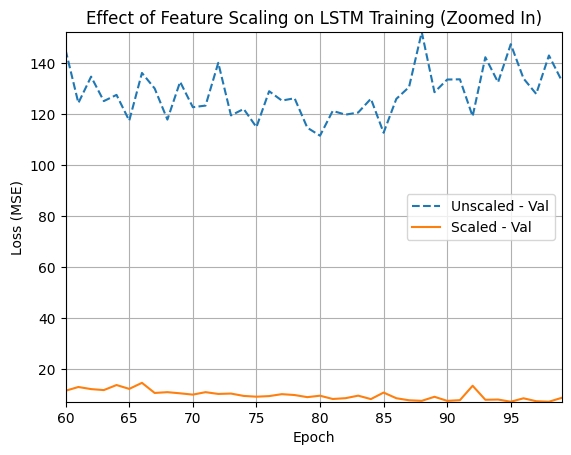

In [16]:
# Validation losses
plt.plot(info_un_scaled.history['val_loss'], label='Unscaled - Val', linestyle='--')
plt.plot(info.history['val_loss'], label='Scaled - Val')

plt.title("Effect of Feature Scaling on LSTM Training (Zoomed In)")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")

# Zoom into the last 40 epochs
total_epochs = len(info.history['val_loss'])
start_epoch = total_epochs - 40
plt.xlim(start_epoch, total_epochs - 1)

#tighter y-axis
plt.ylim(
    min(min(info_un_scaled.history['val_loss'][start_epoch:]), min(info.history['val_loss'][start_epoch:])),
    max(max(info_un_scaled.history['val_loss'][start_epoch:]), max(info.history['val_loss'][start_epoch:]))
)

plt.legend()
plt.grid(True)
#plt.tight_layout()
plt.show()
